In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-25.], device='cuda:0') tensor(167.7159, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.2927, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(50.9877, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7641, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6272, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.6219, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.8314, device='cuda:0', dtype=torch.float64)


/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


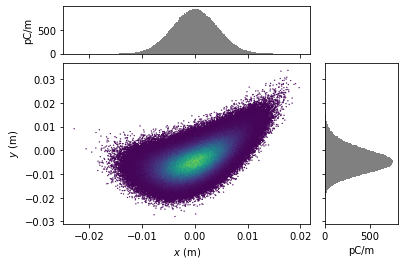

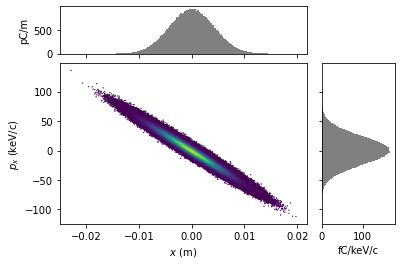

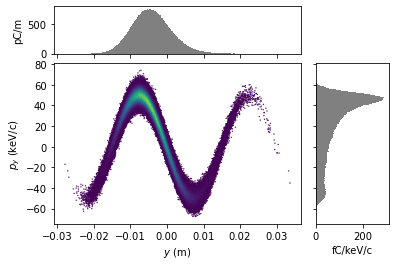

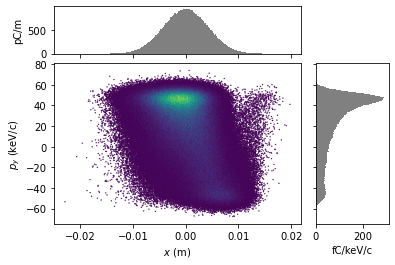

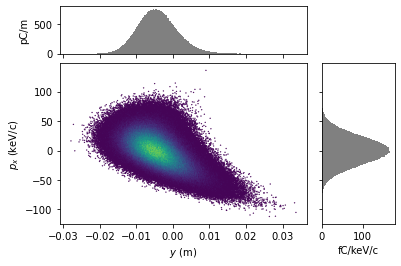

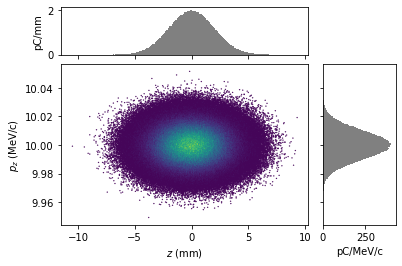

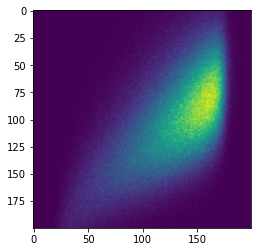

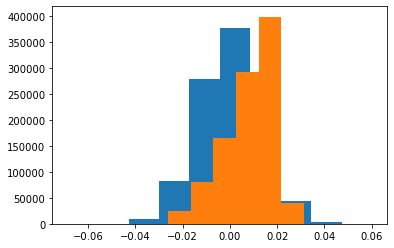

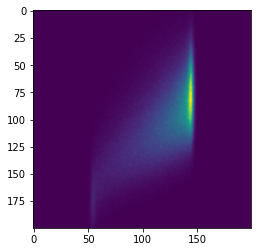

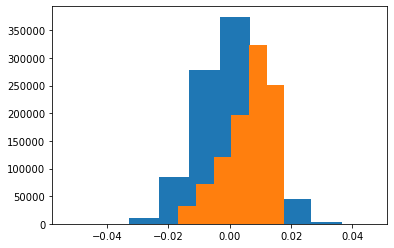

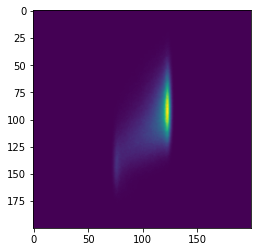

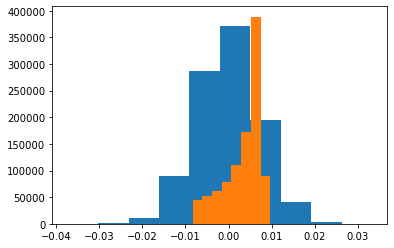

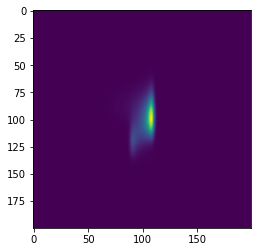

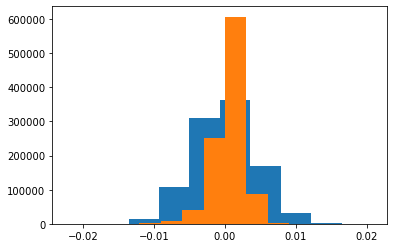

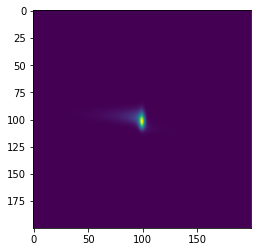

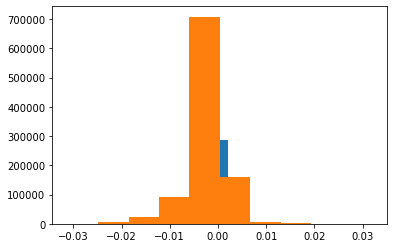

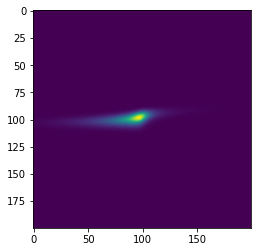

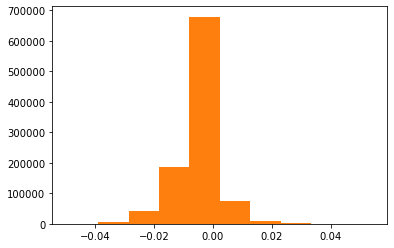

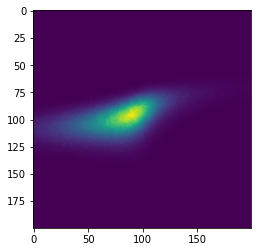

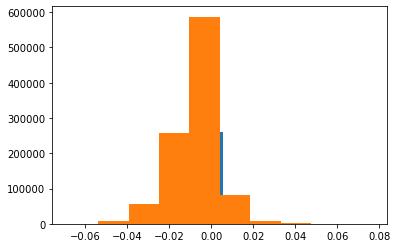

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1517844393476044e-05
beta 2.584253426959582
alpha 0.9868032082548436
gamma 0.7637720632315224


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0000269068526482e-06
beta 8.999887920680058
alpha 4.999928870387464
gamma 2.888845832090038


In [6]:
beam_coords.shape

torch.Size([1000000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0003)

(array([3.50000e+01, 1.20300e+03, 2.09450e+04, 1.39727e+05, 3.51985e+05,
        3.40173e+05, 1.26876e+05, 1.80980e+04, 9.38000e+02, 2.00000e+01]),
 array([-5.07385079e-03, -4.05229517e-03, -3.03073955e-03, -2.00918393e-03,
        -9.87628306e-04,  3.39273168e-05,  1.05548294e-03,  2.07703856e-03,
         3.09859418e-03,  4.12014981e-03,  5.14170543e-03]),
 <BarContainer object of 10 artists>)

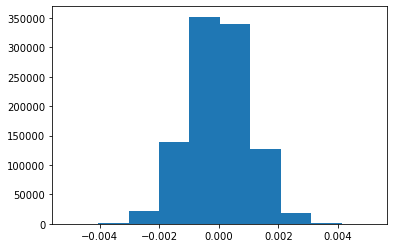

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())